# Identificar fronteras no lineales

In [19]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

In [2]:
X, Y = make_circles(100, factor= .1, noise= .1)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [6]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

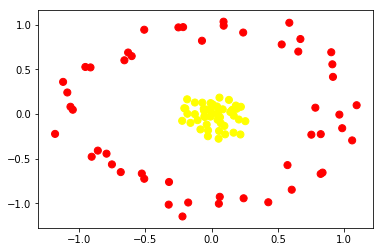

In [8]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')

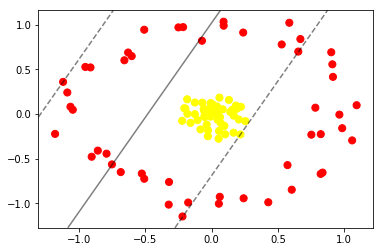

In [10]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
plt_svc(SVC(kernel='linear').fit(X,Y), plot_support= False)

In [11]:
r = np.exp(-(X**2).sum(1))

In [14]:
r

array([0.50484573, 0.53777566, 0.24982681, 0.30643142, 0.98413197,
       0.2745908 , 0.96832075, 0.42101475, 0.93105443, 0.9589902 ,
       0.3669772 , 0.32011993, 0.39491354, 0.29926778, 0.32020936,
       0.32110678, 0.99794027, 0.97974247, 0.41919409, 0.99322369,
       0.31740997, 0.96362709, 0.51876941, 0.3377002 , 0.99645909,
       0.99620772, 0.45622267, 0.97302444, 0.96538239, 0.96125463,
       0.41137435, 0.98868431, 0.40944788, 0.96366052, 0.33112753,
       0.96732654, 0.3639841 , 0.29764527, 0.96127104, 0.40481205,
       0.48221641, 0.9842553 , 0.41321183, 0.99995075, 0.31312365,
       0.43806691, 0.99800063, 0.23626387, 0.36298321, 0.97204425,
       0.98528212, 0.93891236, 0.92333885, 0.99027631, 0.97285929,
       0.99371855, 0.34099643, 0.99463407, 0.99136363, 0.95820342,
       0.98438208, 0.53920894, 0.99531756, 0.94096269, 0.36936453,
       0.99644086, 0.31564714, 0.32227242, 0.94616984, 0.9751625 ,
       0.37327847, 0.45729943, 0.9548454 , 0.25499782, 0.99532

In [15]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [16]:
from ipywidgets import interact, fixed

interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-3.20856581e-01, -7.61940568e-01],
       [ 7.52579453e-01, -2.32245487e-01],
       [ 5.86421280e-01,  1.02132143e+00],
       [-9.51782487e-01,  5.26185715e-01],
       [-1.05734729e-01, -6.93933914e-02],
       [ 9.02621293e-01,  6.91193237e-01],
       [-1.25743995e-01,  1.27985691e-01],
       [ 6.18933945e-02, -9.28039130e-01],
       [ 1.65695974e-01, -2.09719762e-01],
       [ 1.30892333e-01,  1.57294708e-01],
       [-2.50105030e-01,  9.69485970e-01],
       [ 9.10992896e-01,  5.56013959e-01],
       [ 9.63863709e-01, -7.42856679e-03],
       [ 1.09400630e+00,  9.78097251e-02],
       [-1.06408956e+00,  8.05832426e-02],
       [-3.23217841e-01, -1.01563369e+00],
       [-7.62586392e-03,  4.47626729e-02],
       [ 1.41429456e-01,  2.15229778e-02],
       [-6.29279485e-01,  6.88061454e-01],
       [-5.91892058e-02,  5.74108944e-02],
       [-5.07701068e-01,  9.43292463e-01],
       [ 5.95977258e-02,  1.83027344e-01],
       

In [17]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

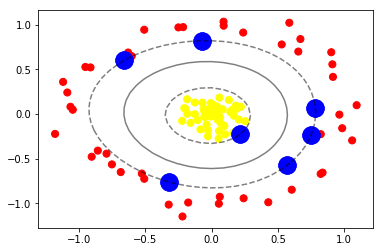

In [18]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

# Ajustar los parametros de SVM

In [20]:
X, Y = make_blobs(n_samples=100 , centers=2, random_state=0, cluster_std=1.2)


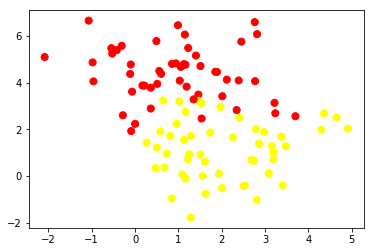

In [21]:
plt.scatter(X[:,0],X[:,1], c=Y, s = 50, cmap='autumn')

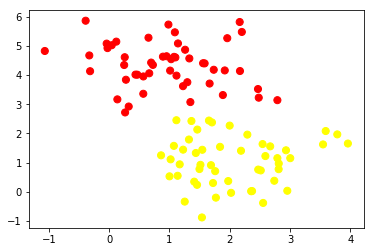

In [22]:
X,Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

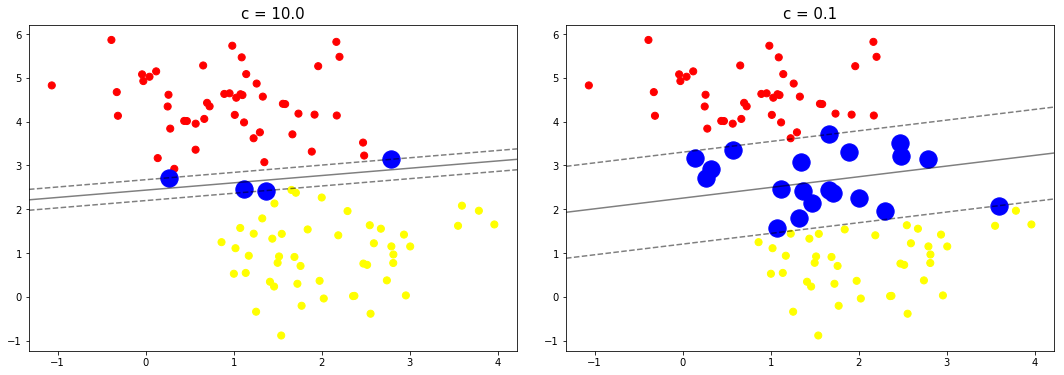

In [24]:
fig , ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.06, right=0.95, wspace=0.1)

for ax_i, C in zip(ax,[10.0,0.1]):
    model = SVC(kernel='linear',C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
    plt_svc(model,ax_i)
    ax_i.set_title('c = {0:.1f}'.format(C), size = 15)